In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [15]:
df['Surname']=le.fit_transform(df['Surname'])
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
#seaborn
import seaborn as sns

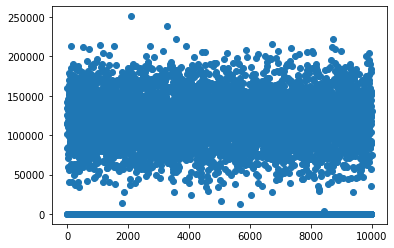

In [29]:
plt.scatter(df.index,df['Balance'])
plt.show()

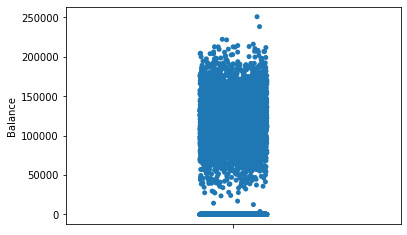

In [30]:
sns.stripplot(y=df['Balance'])

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

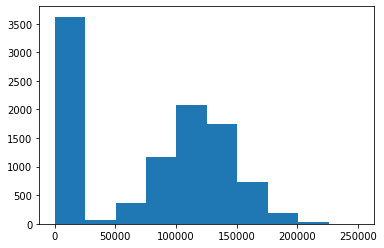

In [31]:
plt.hist(df['Balance'])

In [32]:
#split Data

In [33]:
x = df.iloc[:,0:12].values
y = df.iloc[:,12:14].values

In [34]:
x

array([[1.0000000e+00, 1.5634602e+07, 1.1150000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.0000000e+00, 1.5647311e+07, 1.1770000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.0000000e+00, 1.5619304e+07, 2.0400000e+03, ..., 3.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [9.9980000e+03, 1.5584532e+07, 1.5700000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [9.9990000e+03, 1.5682355e+07, 2.3450000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+04, 1.5628319e+07, 2.7510000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [35]:
y

array([[1.0134888e+05, 1.0000000e+00],
       [1.1254258e+05, 0.0000000e+00],
       [1.1393157e+05, 1.0000000e+00],
       ...,
       [4.2085580e+04, 1.0000000e+00],
       [9.2888520e+04, 1.0000000e+00],
       [3.8190780e+04, 0.0000000e+00]])

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
xtrain

array([[7.6820000e+03, 1.5633608e+07, 2.5900000e+02, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [9.0320000e+03, 1.5742323e+07, 1.6400000e+02, ..., 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.6920000e+03, 1.5760244e+07, 1.3040000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [3.2650000e+03, 1.5574372e+07, 1.2020000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.8460000e+03, 1.5664035e+07, 2.1220000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.7330000e+03, 1.5592816e+07, 2.6780000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [42]:
xtest

array([[9.3950000e+03, 1.5615753e+07, 2.6910000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [8.9900000e+02, 1.5654700e+07, 8.4600000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.3990000e+03, 1.5633877e+07, 1.8570000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [9.3080000e+03, 1.5680405e+07, 2.0890000e+03, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [8.3950000e+03, 1.5597983e+07, 3.3600000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [5.2340000e+03, 1.5591286e+07, 2.4530000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]])

In [43]:
ytest

array([[1.9285267e+05, 0.0000000e+00],
       [1.2870210e+05, 1.0000000e+00],
       [7.5732250e+04, 0.0000000e+00],
       ...,
       [1.6740029e+05, 0.0000000e+00],
       [7.0849470e+04, 0.0000000e+00],
       [3.3759410e+04, 1.0000000e+00]])

In [44]:
ytrain

array([[5.5796830e+04, 1.0000000e+00],
       [1.9823020e+04, 0.0000000e+00],
       [1.3848580e+04, 0.0000000e+00],
       ...,
       [1.8142987e+05, 0.0000000e+00],
       [1.4875016e+05, 0.0000000e+00],
       [1.1885526e+05, 1.0000000e+00]])